In [145]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [146]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [147]:
mymean = 100

In [148]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

(0, 12)

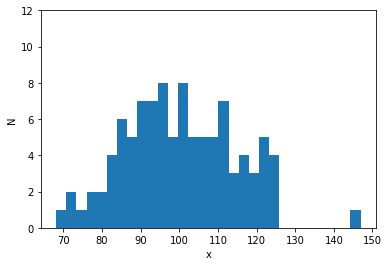

In [149]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md1 = {}
# md is an empty disctionary
md1['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md1['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
ylim(0,12) 

In [150]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md1['chisq'].mean(), md1['chisq'].std()))


Chisq mean: 100.33, standard deviation: 14.48


In [151]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


(0, 2000)

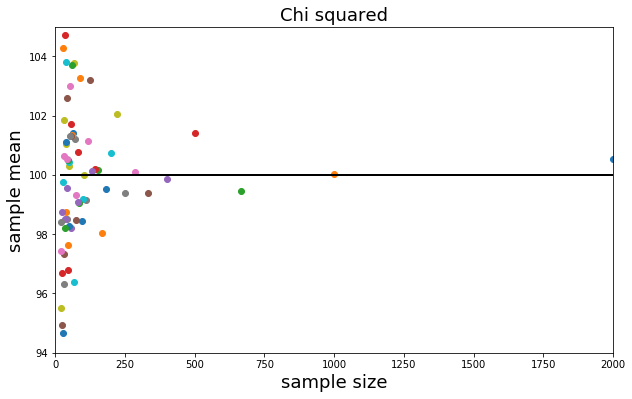

In [152]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md1['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md1['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md1['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md1['chisq']:
    if not type(nn) == str:
        md1['chisq']['means'][nn] = md1['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md1['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

ylim(94,105)
xlim(0,2000)

Text(0,0.5,'N')

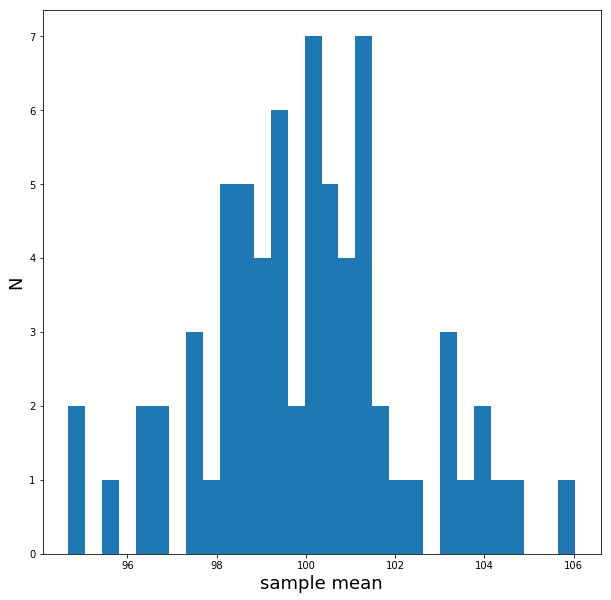

In [153]:
allmeans = list(md1['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# For the normal distribution 

In [154]:
distributions = ['gaus']

In [155]:
mymean = 100 

Text(0.5,0,'x')

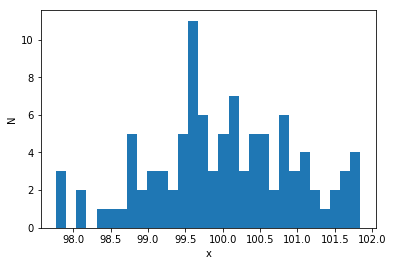

In [156]:
import numpy as np
md3= {}
# md is an empty disctionary
md3['gaus'] = np.random.normal (100,1,100)
# md now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md3['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [157]:
print ("Gauss mean: %.2f, standard deviation: %.2f"%(md3['gaus'].mean(), md3['gaus'].std()))


Gauss mean: 100.01, standard deviation: 0.97


In [158]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)


[684 278 201   7 787 767 363  77 201 715 771 307 564 642 117 544 947 978
 604 512 391 719 925 682 923 853   2 416 715 818 920 319 413 608  57 895
 514 125  24  88 619 863 548 316 655 882 736 904 431 496 173 782 636 850
 482 901  32 585 625 218 386 823  86 902 603 751 365 769 211 505 107 628
 364 766 600 811 944 911 699 473 206 536 352  13 487 172 541 406 507 984
 431 345 989 860 830  28 633 824  93 872] (100,)


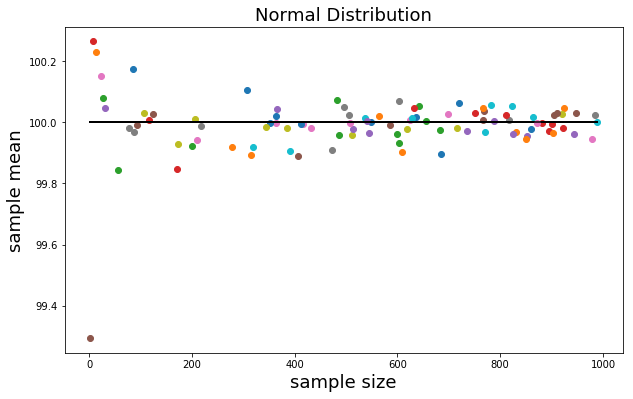

In [159]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md3['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md3['gaus'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md3['gaus']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md3['gaus']:
    if not type(nn) == str:
        md3['gaus']['means'][nn] = md3['gaus'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md3['gaus']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


Text(0,0.5,'N')

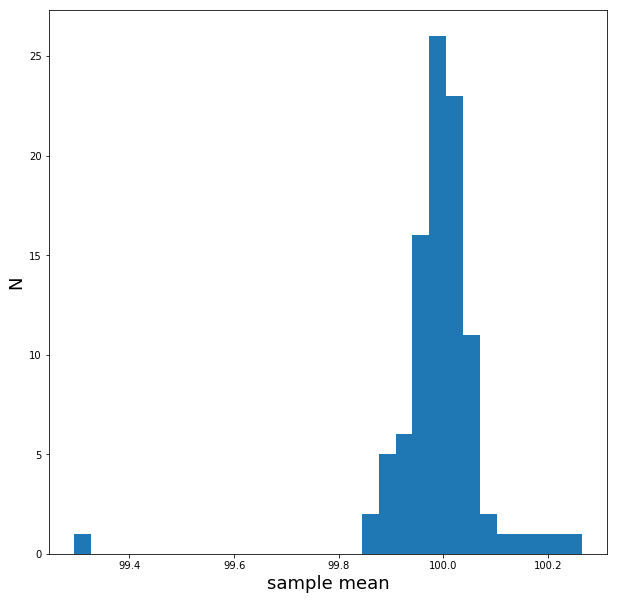

In [160]:
allmeans = list(md3['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)


# For the Poisson Distribution 

In [161]:
distributions = ['pois']
mymean = 100

Text(0.5,0,'x')

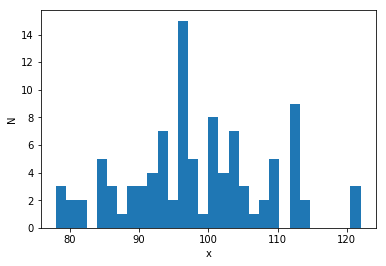

In [162]:
md4 = {}
# md is an empty disctionary
md4['pois'] = np.random.poisson(100,100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md4['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [163]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md4['pois'].mean(), md4['pois'].std()))

Poisson mean: 98.38, standard deviation: 10.00


In [164]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[347 858 179 302 333 572 592 167 945 445 201 220 992 315 158 559 822 752
 307 561 416 473 872 666 399 334 320  99 910 520 691 277 937 634 565 836
 464  71 153  32 103 478 768 463   8 975 707 565 760 118  72 985 977 826
 168  36 483 379 151 745 911 344 549 731 877  88 909 516 780 569  11 842
 604 221  69 115 962 843 769 362 602 110 858  16  18 440 920 238 968 586
 960  46 107 712 725  81 801 845 125 325] (100,)


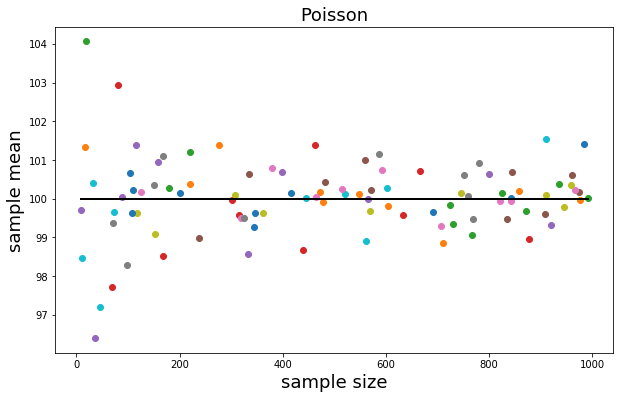

In [165]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md4['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md4['pois'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md4['pois']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md4['pois']:
    if not type(nn) == str:
        md4['pois']['means'][nn] = md4['pois'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md4['pois']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

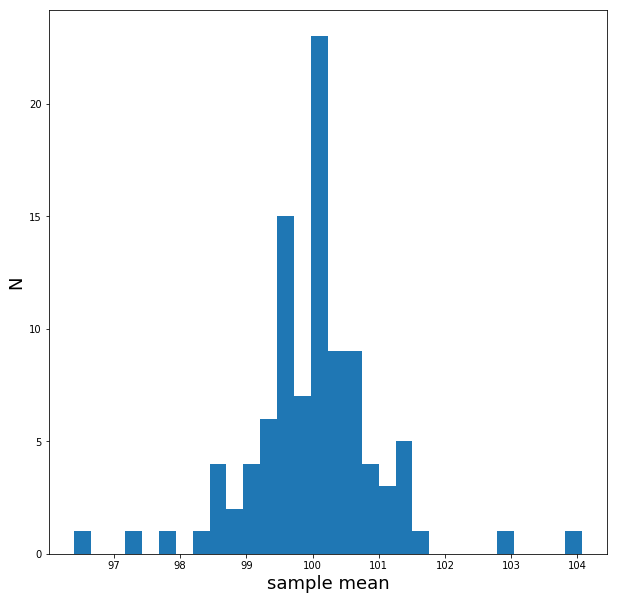

In [166]:
allmeans = list(md4['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Now for a binomial distribution 


In [167]:
distributions = ['binomial']
mymean = 100

Text(0.5,0,'x')

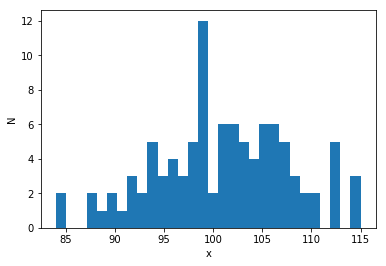

In [169]:
md5 = {}
# md is an empty disctionary
md5['binomial'] = np.random.binomial(200,.5,100)
# md now is a dictionary with one object: an array by the key 'binomial'
#Setting n at 200 and p at .5 should get the same mean as the other distributions-100
pl.hist(md5['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [170]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md5['binomial'].mean(), md5['binomial'].std()))

Binomial mean: 100.91, standard deviation: 6.65


In [171]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


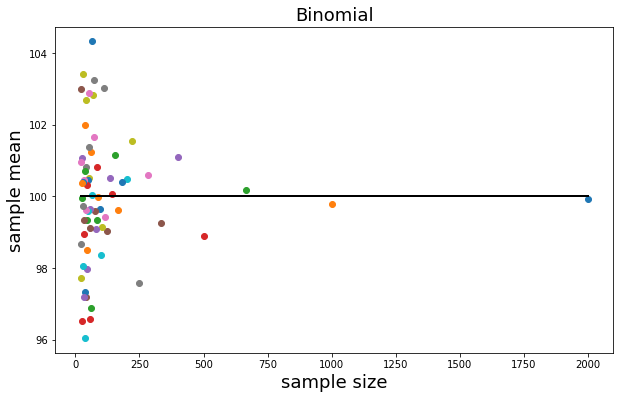

In [172]:
md5['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md5['binomial'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md5['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md5['binomial']:
    if not type(nn) == str:
        md5['binomial']['means'][nn] = md5['binomial'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md5['binomial']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


Text(0,0.5,'N')

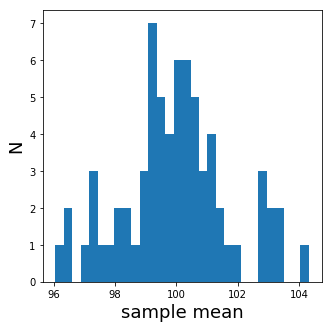

In [173]:
allmeans = list(md5['binomial']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Now an Exponential Distribution

In [ ]:
distributions = ['expon']

In [ ]:
mymean = 100

Text(0.5,0,'x')

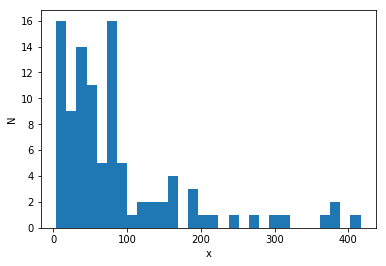

In [175]:
md2 = {}
# md is an empty disctionary
md2['expon'] = np.random.exponential(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md2['expon'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [176]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(md2['expon'].mean(), md2['expon'].std()))


Exponential mean: 87.37, standard deviation: 89.19


In [177]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[774 403 883 311 670 437 677 201 992 369 303 300 246 693 430 329 944 227
 785 269 810 858 608 220 379 729 170 571 598 684 655 133 908 989 403 815
 758 695 544 179 812 331 468 582 235   4 581 654 812 219 746 617 353 909
 556 913 322 170 575 436 960 864 639 728 833 861 715  50 721 916 514 929
 318 140 663 429 847  20 383 205 582 825 162 266 473 704 593 390 331 410
 997 874 707 590 828 574 683 273 923 488] (100,)


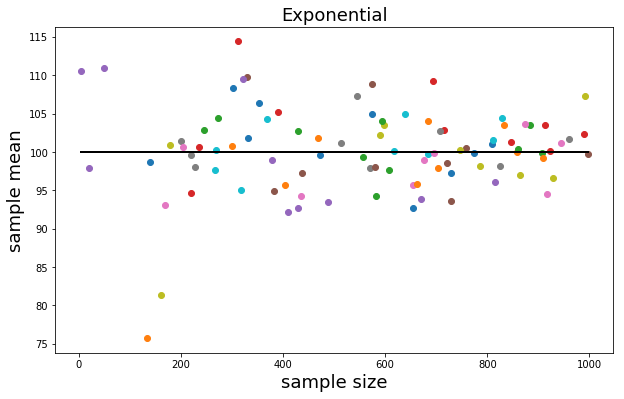

In [178]:
md2['expon'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md2['expon'][n] = np.random.exponential(df, size = n)
    
# save the means for plotting later    

md2['expon']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md2['expon']:
    if not type(nn) == str:
        md2['expon']['means'][nn] = md2['expon'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md2['expon']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Exponential', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

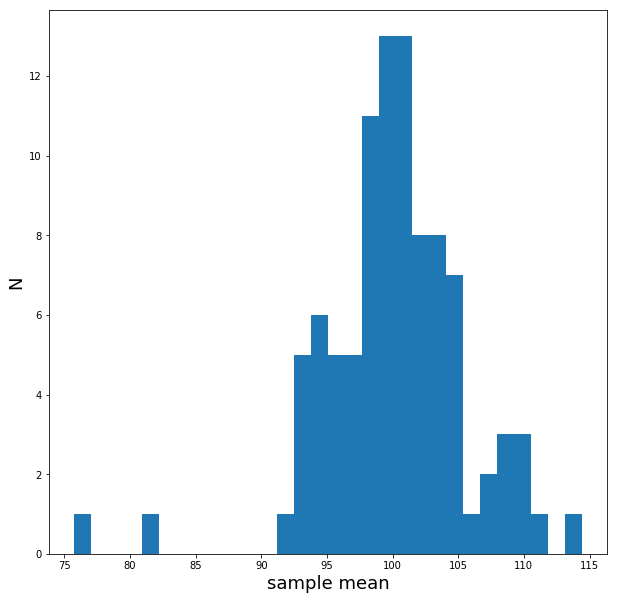

In [179]:
allmeans = list(md2['expon']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Sample Means from all Distributions

In [186]:
#all_5 = list(md1[] + md2[] + md3[] + md4[] + md5[])

In [185]:
#all_5 = merg_dicts(m1,m2,m3,m4,m5)